# Análise Facebook

## Importando Dados

In [1]:
import pandas as pd

In [2]:
df_data = pd.read_csv('Live.csv', sep=',')
df_data.drop(columns = ['Column1', 'Column2', 'Column3', 'Column4'], inplace=True)

## Verificando Valores Nulos na base

In [3]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
status_id           7050 non-null object
status_type         7050 non-null object
status_published    7050 non-null object
num_reactions       7050 non-null int64
num_comments        7050 non-null int64
num_shares          7050 non-null int64
num_likes           7050 non-null int64
num_loves           7050 non-null int64
num_wows            7050 non-null int64
num_hahas           7050 non-null int64
num_sads            7050 non-null int64
num_angrys          7050 non-null int64
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


Conforme visto, há 7050 linhas na base, porém nenhuma delas há valores faltantes.

## Verificar se há dados repetidos

In [4]:
len(df_data[df_data.duplicated()])

51

Conforme Observado, há 51 valores repetidos, iremos excluir e manter apenas os primeiros que aparecem.

In [5]:
df_data.drop_duplicates(keep='first', inplace=True)

In [6]:
len(df_data[df_data.duplicated()])

0

## Eliminando Colunas Desnecessárias

A Coluna status_id é apenas um identificador do status, iremos eliminar a mesma.

In [7]:
df_data.drop(columns='status_id', inplace=True)
df_data.head(1)

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0


## Convertendo o tipo das colunas

Conforme visto na primeira parte, a coluna de status_type é uma string, precisamos transformá-la em número, e a coluna status_published é um object, precisamos transformá-la em datetime.

In [8]:
from sklearn import preprocessing
labelEncoder = preprocessing.LabelEncoder()

In [9]:
df_data['status_type'] = labelEncoder.fit_transform(df_data['status_type'])

In [10]:
df_data.head(1)

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,4/22/2018 6:00,529,512,262,432,92,3,1,1,0


Agora é preciso transformar a coluna status_published para datetime.

In [11]:
df_data['status_published'] = pd.to_datetime(df_data['status_published'], errors='raise')

In [12]:
df_data.head(1)

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0


## Verificando se o número de reações é igual a soma das reações

In [13]:
filter_reactions = df_data['num_reactions'] == (df_data['num_likes'] + df_data['num_loves'] + df_data['num_wows'] + df_data['num_hahas'] + df_data['num_sads'] + df_data['num_angrys'])
len(df_data[~filter_reactions])

9

Há 9 linhas que não bate a quantidade de reações total com a soma das reações.

In [14]:
df_data = df_data[filter_reactions]
len(df_data)

6990

# Buscando e Eliminando Outliers

## Coluna do Tipo de Status

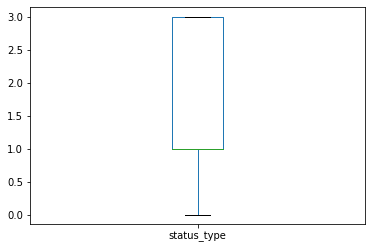

In [15]:
df_data['status_type'].plot.box()

Como visto, não foi indicado nenhum possível outlier.

## Coluna de reações

Conforme visto anteriormente, as linhas gravadas com erros envolvendo reações já foram removidas verificando a paridade da soma das reações pela quantidade de reação total.

# Eliminando coluna Redundante

A coluna num_reactions é uma coluna redudante, uma vez que possui a soma das colunas de reações, por este motivo a mesma será eliminada.

In [16]:
df_data.drop(columns = ['num_reactions'], inplace=True)
df_data.drop(columns = ['status_published'], inplace=True)

## Formatando a Data

A príncipio a data foi quebrado em horas e dias da semana, porém isso fez com que piorasse o resultado do algorítimo, levando a deletar a coluna referente a data.

In [17]:
#df_data['status_published'] = pd.to_datetime(df_data['status_published'], errors='raise')
#df_data['status_published'] = pd.to_datetime(df_data['status_published'], errors='raise').dt.hour
df_data.head(1)

,status_type,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,512,262,432,92,3,1,1,0


## Obtendo a Saída Y

In [18]:
y_out = df_data['status_type']

## Normalizando Valores

In [19]:
numeric_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

In [20]:
for column in df_data.select_dtypes(numeric_types):
    df_data[column] = (df_data[column] - df_data[column].min())/(df_data[column].max() - df_data[column].min())
pd.DataFrame([df_data.min(), df_data.max()], index = ['Min', 'Max'])

,status_type,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
Min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## PCA

O primeiro passo será rodar o algorítimo do PCA para encontrarmos as melhores variáveis que apresentam uma boa variação na base de dados.

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components=9)

In [23]:
principalComponents = pca.fit_transform(df_data)

In [24]:
PCA_components = pd.DataFrame(principalComponents)

([<matplotlib.axis.XTick at 0x7f47d8f1ac90>,
 <a list of 9 Text xticklabel objects>)

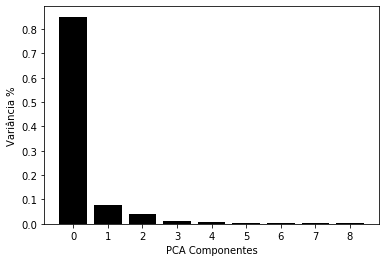

In [25]:
import matplotlib.pyplot as plt
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA Componentes')
plt.ylabel('Variância %')
plt.xticks(features)

A figura acima mostra que as variáveis que apresentam as maiores variação são as 3 primeiras, mas para melhor visualização, iremos ver a quantidade de clusters que é possível identificar apenas com as duas primeiras.

Text(0, 0.5, 'PCA Componente 2')

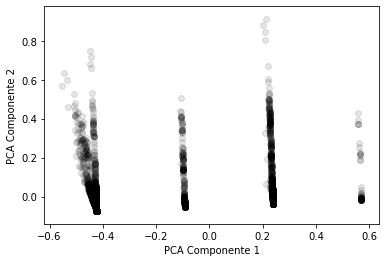

In [26]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA Componente 1')
plt.ylabel('PCA Componente 2')

Na figura é possível identificar claramente 4 clusters.

## Encontrando Os Clusters

Aqui tentaremos encontrar o número de clusters para as 3 melhores variáveis, acima vimos que é possível identificar 4 clusters, porém iremos iterar sobre um valor de 1 a 9, e ver como se comprota a métrica de inertia em cada um desses valores, para determinar o número de clusters ótimos.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [28]:
inertia_values = []
ks = range(1, 10)
for n in ks:
    kmeans = KMeans(n_clusters=n, algorithm='elkan', random_state=42).fit(PCA_components.iloc[:,:3])
    inertia_values.append(kmeans.inertia_)

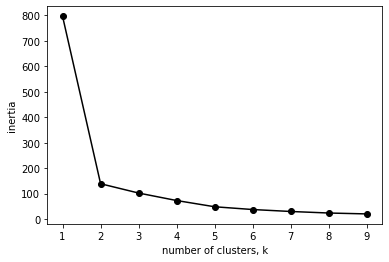

In [29]:
#pd.DataFrame([inertia_values]).plot.bar()
plt.plot(ks, inertia_values, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Inertica é uma métrica que mede a coerência dos clusters, na figura vemos que após 4 clusters, a variação entre os valores é mínima, ou seja a distorção entre os clusters é mínimas, indicando que seja o k ótimo é 4.

## KMeans 

In [30]:
kmeans = KMeans(n_clusters=4).fit(PCA_components.iloc[:,:3])

In [31]:
labels = kmeans.labels_

In [32]:
correct_labels = sum(y_out == labels)
print('Taxa de Acerto: {}'.format(correct_labels/y_out.size))

Taxa de Acerto: 0.582689556509299


## Clustering Hierárquico - Completo

In [33]:
from sklearn.cluster import AgglomerativeClustering

In [34]:
clustering = AgglomerativeClustering(n_clusters=4, linkage='complete').fit(PCA_components.iloc[:,:3])

In [35]:
print('Taxa de Acerto: {}'.format(sum(y_out ==  clustering.fit_predict(df_data))/y_out.size))

Taxa de Acerto: 0.6104434907010015


## Clustering Hierárquico - Single

In [40]:
clustering = AgglomerativeClustering(n_clusters=4, linkage='single').fit(PCA_components.iloc[:,:3])

In [41]:
print('Taxa de Acerto: {}'.format(sum(y_out ==  clustering.fit_predict(df_data))/y_out.size))

Taxa de Acerto: 0.009155937052932762
